In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [64]:
data=pd.read_csv("/Users/home/Desktop/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
#to check whether the data sets is having any null value
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [66]:
#To get the columns
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [67]:
data.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [68]:
# Three categorical values are there need to apply label encoder

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
data['sex']= label_encoder.fit_transform(data['sex'])
data['smoker']= label_encoder.fit_transform(data['smoker'])
data['region']= label_encoder.fit_transform(data['region'])

In [69]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [70]:
data.shape

(1338, 7)

In [71]:
#it provides the mean,std deviation,min

data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [80]:
# splitting features and target
X = data.drop(columns='charges')
Y = data['charges']
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


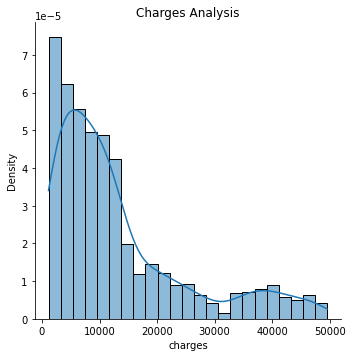

In [81]:
#outlier detection in target variable
# Analysing target - Charges using seaborn
sns.displot(data=data['charges'], kde=True, stat='density', linewidth=1)
plt.title('Charges Analysis')
plt.show()


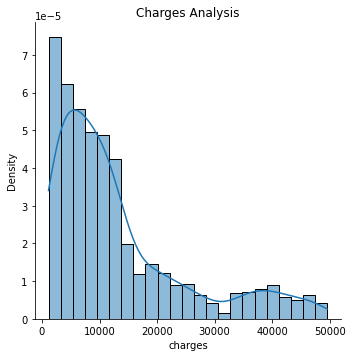

In [82]:
#Removing Outliers

data=data[data['charges']<50000]
sns.displot(data=data['charges'], kde=True, stat='density', linewidth=1)
plt.title('Charges Analysis')
plt.show()

In [83]:
#Train the test split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=7)

In [86]:
# Training the model using Linear Regression algo
#Building the Linear regression Model

lin_model=LinearRegression()

#Fitting the Model

lin_model.fit(X_train,Y_train)

LinearRegression()

In [87]:
Y_train_pred=lin_model.predict(X_train)
rmse=(np.sqrt(mean_squared_error(Y_train,Y_train_pred)))
r2=r2_score(Y_train,Y_train_pred)

print("The model performance for taining set:\n")
print('RMSE:',rmse)
print('R2 score is',r2)

The model performance for taining set:

RMSE: 5765.454025427176
R2 score is 0.7567091121353419


In [88]:
Y_test_pred=lin_model.predict(X_test)
rmse=(np.sqrt(mean_squared_error(Y_test,Y_test_pred)))
r2=r2_score(Y_test,Y_test_pred)

print("The model performance for testing set:\n")
print('RMSE:',rmse)
print('R2 score is',r2)

The model performance for testing set:

RMSE: 6027.532781819489
R2 score is 0.7349826794097075
